In [ ]:
멤버함수: cal_future_price(T년 후의 주가), cal_sample_stats(표본평균과 표본분산 및 이론적 수치에 수렴하는지 여부),
          show_future_price_histogram(T년 후의 주가를 히스토그램으로 시각화), cal_EPS(EPS값 계산), cal_PER(PER값 계산),
          cal_BPS(BPS값 계산), cal_PBR(PBR값 계산)
            
멤버변수: expect_return(기대수익률), volatility(변동성), stock_price(현재주가), net_profit(당기순이익), shares(보통주식수),
          net_assets(순자산), total_shares(총 발행주식수)

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt


class Stock:
    def __init__(self):
        pass
    
class my_stock(Stock):
    def __init__(self):
        pass
    
class Stock:
    def __init__(self, expect_return, volatility, stock_price, net_profit, shares, net_assets, total_shares):
        self.expect_return = expect_return
        self.volatility = volatility
        self.stock_price = stock_price
        self.net_profit = net_profit
        self.shares = shares
        self.net_assets = net_assets
        self.total_shares = total_shares
        
    def cal_future_price(self, T, seed, size):
        np.random.seed(seed)
        z = np.random.normal(0, 1, size)                                                
        future_price = self.stock_price * np.exp((self.expect_return 
                                                  - 0.5 * (self.volatility ** 2)) * T + self.volatility * np.sqrt(T) * z)
        return future_price
    
    def cal_sample_stats(self, T, seed, n):
        future_prices = self.cal_future_price(T, seed, size = n)
        sample_mean = np.mean(future_prices)
        sample_variance = np.var(future_prices)
        E = self.stock_price * np.exp(self.expect_return * T)
        Var= (self.stock_price ** 2) * np.exp(2 * self.expect_return * T) * (np.exp((self.volatility ** 2) * T) - 1)
        if abs(sample_mean - E) < 10:      #임의의 기준값 10(다른 숫자로 수정 가능)
            print('표본평균은 E로 수렴한다')
        else:
            print('표본평균은 E로 수렴하지 않는다')
        if abs(sample_variance - Var) < 10000:     #임의의 기준값 10000(다른 숫자로 수정 가능)
            print('표본분산은 Var로 수렴한다')
        else:
            print('표본분산은 Var로 수렴하지 않는다')
        return sample_mean, E, sample_variance, Var

    def show_future_price_histogram(self, T, seed, size):
        future_prices = self.cal_future_price(T, seed, size)
        plt.plot(future_prices)
        plt.show()
        return future_prices
    
    def cal_EPS(self, net_profit, shares):
        EPS = self.net_profit * self.shares
        return EPS    
    
    def cal_PER(self, stock_price, net_profit, shares):
        EPS = self.cal_EPS(net_profit, shares)
        PER = self.stock_price / EPS
        if PER <= 10:
            print('이 주식은 저PER주 입니다. 주가가 향후 더 오를 가능성이 큽니다.')
        else:
            print('이 주식은 저PER주가 아닙니다. 주가가 향후 더 오를 가능성이 작습니다.')
        return PER
    
    def cal_BPS(self, net_assets, total_shares):
        BPS = self.net_assets / self.total_shares
        return BPS
    
    def cal_PBR(self, stock_price, net_assets, total_shares):
        BPS = self.cal_BPS(net_assets, total_shares)
        PBR = self.stock_price / BPS
        if PBR <= 0.7:
            print('매수를 적극적으로 고려해보십시오.')
        elif 0.7 < PBR < 1.5:
            print('매수 고려 시 다른 지표들도 비교하십시오.')
        else:
            print('매수를 별로 추천드리지 않습니다.')
        return PBR


In [3]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
x = my_stock.cal_future_price(10, 265, 10)

print(x)

[41174.38762382 13952.53828162 14850.28558345 30233.07874719
 15705.99263709  6911.39478959  7652.08445776 11800.96712806
 21481.37774648 13342.90825543]


In [4]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
y = my_stock.cal_sample_stats(10, 265, 100)

print(y)

표본평균은 E로 수렴하지 않는다
표본분산은 Var로 수렴하지 않는다
(14694.927457973408, 14841.31591025766, 112012551.94532637, 108331598.79636598)


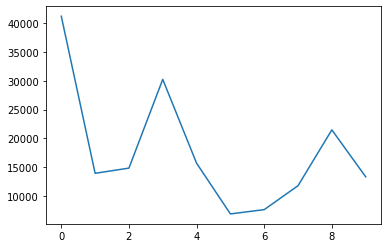

[41174.38762382 13952.53828162 14850.28558345 30233.07874719
 15705.99263709  6911.39478959  7652.08445776 11800.96712806
 21481.37774648 13342.90825543]


In [5]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
a = my_stock.show_future_price_histogram(10, 265, 10)

print(a)

In [6]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
b = my_stock.cal_EPS(8500, 100)

print(b)

850000


In [7]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
c = my_stock.cal_PER(100, 8500, 100)

print(c)

이 주식은 저PER주 입니다. 주가가 향후 더 오를 가능성이 큽니다.
0.00011764705882352942


In [8]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
d = my_stock.cal_BPS(80000, 100)

print(d)

800.0


In [9]:
my_stock = Stock(0.5, 0.2, 100, 8500, 100, 80000, 100)
e = my_stock.cal_PBR(100, 80000, 100)

print(e)

매수를 적극적으로 고려해보십시오.
0.125
